In [18]:
import os
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

from find_nucleus import hls_trans

In [2]:
file_name = "/home/hdd0/Develop/tct/ImgHub/batch6.2_ori/SC/2017-10-09-16_03_56_x21407_y18039_w42_h40.jpg"

In [3]:
img = cv2.imread(file_name)

img = hls_trans(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
# blur = cv2.GaussianBlur(gray, (5,5), 0)
# ret3,th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

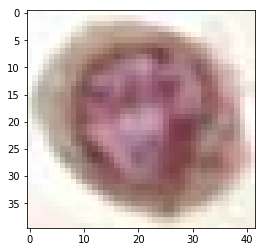

In [5]:
plt.imshow(img)

In [6]:
# plt.imshow(th3, cmap="gray")

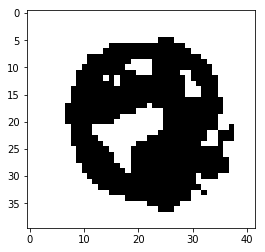

In [17]:
mask = gray > threshold_otsu(gray)/1.35
plt.imshow(mask, cmap="gray")

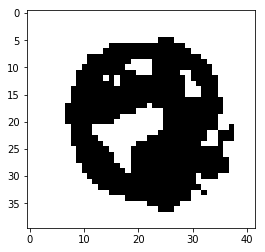

In [8]:
img2 = np.array(mask * 255, dtype=np.uint8)
plt.imshow(img2, cmap="gray")

In [9]:
img3, contours, hierarchy = cv2.findContours(img2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

(70, 1, 2)


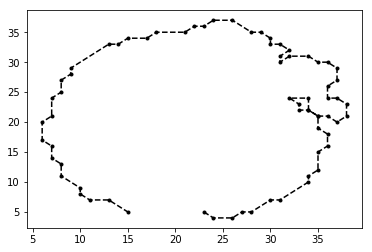

In [10]:
contour = contours[1]  # the circle coordinates we want
print(contour.shape)
xs = contour[:, 0, 0]
ys = contour[:, 0, 1]
plt.plot(xs, ys, marker='.', color='black', linestyle='dashed')

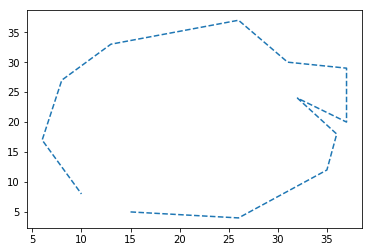

In [11]:
poly = cv2.approxPolyDP(contour, 2, True)
plt.plot(poly[:, 0, 0], poly[:, 0, 1], linestyle='dashed')

In [12]:
cv2.drawContours(img, contours, 1, (0,0,255), 1)
cv2.imwrite("./test.jpg", img)
# cv2.imshow("contours", img)
# cv2.waitKey(0)

area = cv2.contourArea(contour)
print(area)

768.5


In [ ]:
cv2.drawContours(gray, contours, 1, (0,0,255), 1)
cv2.imwrite("./gray.jpg", gray)

area = cv2.contourArea(contours[1])
print(area)

In [ ]:
mask_contour = np.zeros_like(gray)
cv2.drawContours(mask_contour, contours, 1, color=255, thickness=-1)
cv2.imwrite("./mask_contour.jpg", mask_contour)

pts = np.where(mask_contour == 255)
gray_contour = gray[pts[0], pts[1]]

In [ ]:
print(type(gray_contour), gray_contour.shape)
print(gray_contour)
print(sum(gray_contour))

In [ ]:
kernel_size = (5, 5)
kernel = np.ones(kernel_size, np.uint8)

In [ ]:
dilation = cv2.dilate(img2, kernel, iterations=1)
plt.imshow(dilation, cmap="gray")

In [ ]:
erosion = cv2.erode(dilation, kernel, iterations=1)
plt.imshow(erosion, cmap="gray")

In [ ]:
dilation = cv2.dilate(erosion, kernel, iterations=1)
plt.imshow(dilation, cmap="gray")

In [28]:
import os
import shutil

In [37]:
ori = "/home/nvme/CELLS/HSIL_S-half"
mask = "/home/nvme/CELLS/HSIL_S-half-mask"
nucleus = "/home/nvme/CELLS/HSIL_S-half-nucleus"
train = "/home/nvme/CELLS/HSIL_S-half-train"

In [38]:
nucleus_names = [os.path.splitext(f)[0] for f in os.listdir(nucleus)]
print(len(nucleus_names), nucleus_names[0])

5139 2017-09-15-10_46_25_x27096_y24472_w92_h122


In [39]:
for name in nucleus_names:
    shutil.copy(ori+'/'+name+".bmp", train)
    shutil.copy(mask+'/'+name+".png", train)